In [4]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [5]:
%cd 'drive/My Drive/ML-Introduction'

/content/drive/My Drive/ML-Introduction


Pytorch provides two library to crate Dataset and an iterable object to get set of dataset called DataLoader. 


You can use pre-loaded dataset to benchmark your model . 



In [6]:
import torch
from torch.utils.data import Dataset
from torchvision import  datasets
from torchvision.transforms import ToTensor, Lambda 

import matplotlib.pyplot as plt 


In [7]:
training_data = datasets.FashionMNIST(root="FashionMnistData", train=True, download=True, transform=ToTensor())

test_data = datasets.FashionMNIST(root="FashionMnistData", train=False, download=True, transform=ToTensor())

  0%|          | 0/26421880 [00:00<?, ?it/s]

Extracting FashionMnistData/FashionMNIST/raw/train-images-idx3-ubyte.gz to FashionMnistData/FashionMNIST/raw



  0%|          | 0/29515 [00:00<?, ?it/s]

Extracting FashionMnistData/FashionMNIST/raw/train-labels-idx1-ubyte.gz to FashionMnistData/FashionMNIST/raw



  0%|          | 0/4422102 [00:00<?, ?it/s]

Extracting FashionMnistData/FashionMNIST/raw/t10k-images-idx3-ubyte.gz to FashionMnistData/FashionMNIST/raw



  0%|          | 0/5148 [00:00<?, ?it/s]

Extracting FashionMnistData/FashionMNIST/raw/t10k-labels-idx1-ubyte.gz to FashionMnistData/FashionMNIST/raw



/usr/local/lib/python3.7/dist-packages/torchvision/datasets/mnist.py:498: UserWarning: The given NumPy array is not writeable, and PyTorch does not support non-writeable tensors. This means you can write to the underlying (supposedly non-writeable) NumPy array using the tensor. You may want to copy the array to protect its data or make it writeable before converting it to a tensor. This type of warning will be suppressed for the rest of this program. (Triggered internally at  /pytorch/torch/csrc/utils/tensor_numpy.cpp:180.)
  return torch.from_numpy(parsed.astype(m[2], copy=False)).view(*s)


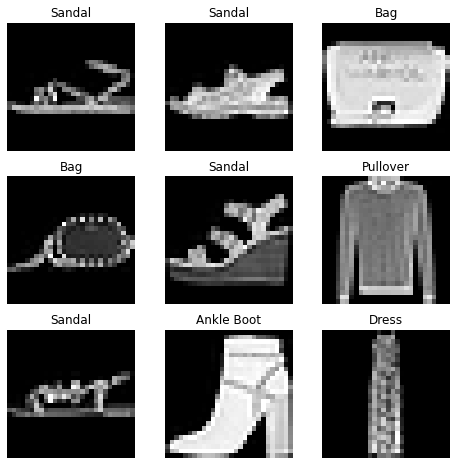

In [8]:
labels_map = {
    0: "T-Shirt",
    1: "Trouser",
    2: "Pullover",
    3: "Dress",
    4: "Coat",
    5: "Sandal",
    6: "Shirt",
    7: "Sneaker",
    8: "Bag",
    9: "Ankle Boot",
}
figure = plt.figure(figsize=(8, 8))
cols, rows = 3, 3
for i in range(1, cols * rows + 1):
    sample_idx = torch.randint(len(training_data), size=(1,)).item()
    img, label = training_data[sample_idx]
    figure.add_subplot(rows, cols, i)
    plt.title(labels_map[label])
    plt.axis("off")
    plt.imshow(img.squeeze(), cmap="gray")
plt.show()

## Creating a Customer Dataset for your data 

In [9]:
import os 
import pandas as pd 
import torchvision.io as tvio 


class CustomImageDataset(Dataset):

  def __init__(self, annotations_file, img_dir, transform=None, target_transform=None):
    self.img_labels = pd.read_csv(annotations_file)
    self.img_dir = img_dir
    self.transform = transform 
    self.target_transform = target_transform 

  def __len__(self):
    return len(self.img_labels)


  def __get__item(self, idx):
    img_path = os.path.join(self.img_dir, self.img_labels.iloc[idx,0])
    image = tvio.read_image(img_path)
    label = self.img_labels[idx, 1]
    if self.transform:
      image = self.transform(image)
    
    if self.target_transform:
      label = self.target_transform(label)

    sample = {"image": image, "label":label}
    return sample 
    

In [10]:
from torch.utils.data import DataLoader 

train_dataloader = DataLoader(training_data, batch_size=64, shuffle=True)
test_dataloader = DataLoader(test_data, batch_size=64, shuffle=True)

In [16]:
training_data = CustomImageDataset(annotations_file="t10k-labels-idx1-ubyte", img_dir='/content/drive/MyDrive/ML-Introduction/FashionMnistData/FashionMNIST/raw/', transform=ToTensor())

# test_data = CustomImageDataset(annotations_file="train-labels-idx1-ubyte", img_dir='/content/drive/MyDrive/ML-Introduction/FashionMnistData/FashionMNIST/raw', target_transform=ToTensor()))

FileNotFoundError: ignored

In [ ]:
train_featurs, train_labels = nex(iter(train_dataloader))

print("Feature batch shape: {}".format(train_featurs.size()))